# Learning Curve
### <mark>Linear Origin Model</mark> (no bias included)
> define the problem data with "Noiseless"
##

### Preparation
- Define the linear origin model and nessesary function.
 > Linear Origin Regression => y = wx (no bias included)
- mean model  

![mean](../assets/meanmodel_lin.png)
</br>

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define X data (bias + weigths)
def define_X_include_bias(X):
    X_b = np.c_[np.zeros((len(X), 1)), X] # define bias to zero
    return X_b

# Normal Equation
def normalEquation(X, y):
    optimized_weights = np.linalg.pinv(X.T.dot(X)).dot(X.T.dot(y)) # w = (XT * X)^-1 * (XT * y)
    return optimized_weights

# Linear Regression
def linearRegression(X, W):
    return np.dot(X, W)

def meanModel(models):
    return np.mean(models, axis=0) 

def costFunction(n_samples, y_pred, y):                     # Mean Sqaure Error (MSE)
    return (1 / (2 * n_samples)) * np.sum((y_pred - y)**2)

### Define a problem data
- Define a problem data as in form of sin function
</br> </br>
![probsin](../assets/problem_sin.png)
</br>

In [7]:
# Define the function
def problem(X):
    return np.sin(np.dot(np.pi, X))

### Generate Data
- genetare a hundred values of x from -1 to 1
- add column of bias (defalut to one) to the X data.
- use those x to define a y from problem data equation

(100,)
(100, 2)


(-2.0, 2.0)

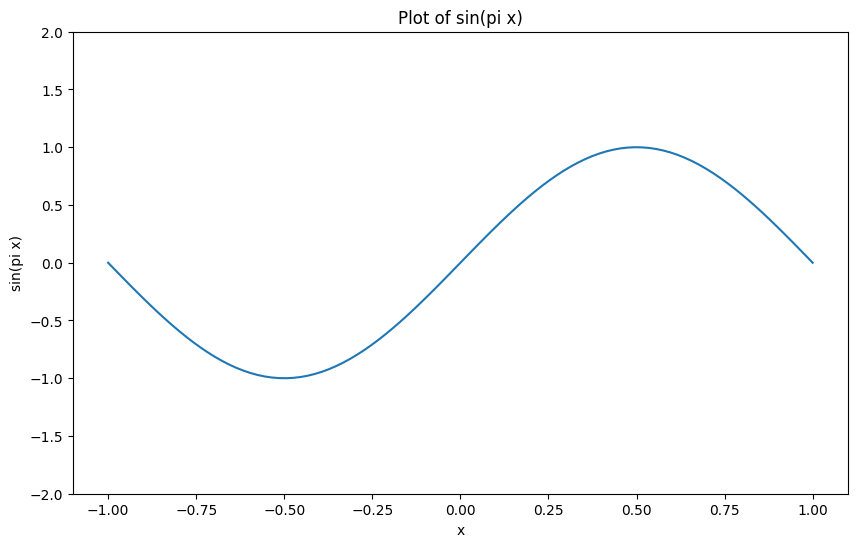

In [8]:
# Generate X features
X = np.linspace(-1, 1, 100)
print(X.shape)

# Define X data (bias + weigths)
X_include_bias = define_X_include_bias(X)
print(X_include_bias.shape)

# Compute y values
y = problem(X)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(X, y, label='sin(pi x)')
plt.title('Plot of sin(pi x)')
plt.xlabel('x')
plt.ylabel('sin(pi x)')
plt.ylim(-2, 2)

### Implementation
We need to create four arrays to store the E_in and E_out (error) from every provided sample size.

> In term of finding E_out, we have to ***"use unseen"*** data for our model to see how well our model is aspect to the general data.

- ***For E_out***: Firstly, we have to store every y_prediction from every iteration to find the mean of g_d (which is the y_hat from every possible data). Then we can calculate the E_out from bias sqaure + variance, which we need to find the "mean of the model" first (just mean all the g_d for each sample size).


- ***For E_in***: In term of E_in, we have to store the cost function value that we get from every possible data and mean them to get the mean of error for each sample size.

In [9]:
sample_size_sets = [2, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# every value from dataset that possible
E_in = [[] for _ in range(len(sample_size_sets))]
E_d = [[] for _ in range(len(sample_size_sets))]
E_out_all = []


for i in range(len(sample_size_sets)):
    for _ in range(1000):
        # random i values from problem dataset
        rands_X = np.random.choice(X, sample_size_sets[i])
        y_sample = problem(rands_X)

        X_sample = define_X_include_bias(rands_X)

        W = normalEquation(X_sample, y_sample)
        
        # for calculate E_out
        y_pred_validation = linearRegression(X=X_include_bias, W=W)
        E_d[i].append(y_pred_validation)
        
        # for calculate E_in
        y_pred_training = linearRegression(X=X_sample, W=W)
        E_in[i].append(costFunction(sample_size_sets[i], y_pred=y_pred_training, y=y_sample))

    mean_model = meanModel(np.array(E_d[i]))
    print("Sample Size: ", sample_size_sets[i])
    z = np.square(mean_model - y)
    bias = np.mean(z)
    print(f"Bias: {bias}")
    
    z = np.square(E_d[i] - mean_model)
    var_x = np.mean(z)
    variance = np.mean(var_x)
    print(f"Variance: {variance}")
    
    E_out = bias + variance
    print(f"E_out: {E_out}\n")
    E_out_all.append(E_out)


E_in_all = []
for i in range(len(E_in)):
    E_in_all.append(np.mean(E_in[i]))

print("E_in_all: ", np.array(E_in_all))

Sample Size:  2
Bias: 0.27954271017939847
Variance: 0.2438697243946757
E_out: 0.5234124345740742

Sample Size:  10
Bias: 0.20452049475414302
Variance: 0.031946206012198934
E_out: 0.23646670076634196

Sample Size:  20
Bias: 0.2035041643426644
Variance: 0.013955196977966431
E_out: 0.21745936132063085

Sample Size:  30
Bias: 0.2033122701367976
Variance: 0.009596217581011065
E_out: 0.21290848771780865

Sample Size:  40
Bias: 0.20323923521203088
Variance: 0.006996644197367632
E_out: 0.2102358794093985

Sample Size:  50
Bias: 0.20335306019360647
Variance: 0.0060458367694299405
E_out: 0.2093988969630364

Sample Size:  60
Bias: 0.20321401228824343
Variance: 0.004577680073340898
E_out: 0.20779169236158432

Sample Size:  70
Bias: 0.20323715324673128
Variance: 0.004031386501763656
E_out: 0.20726853974849493

Sample Size:  80
Bias: 0.20319764598962162
Variance: 0.003399043525613606
E_out: 0.20659668951523522

Sample Size:  90
Bias: 0.20319111587771885
Variance: 0.0029179078278416494
E_out: 0.20610

### Visualize Learning Cruve

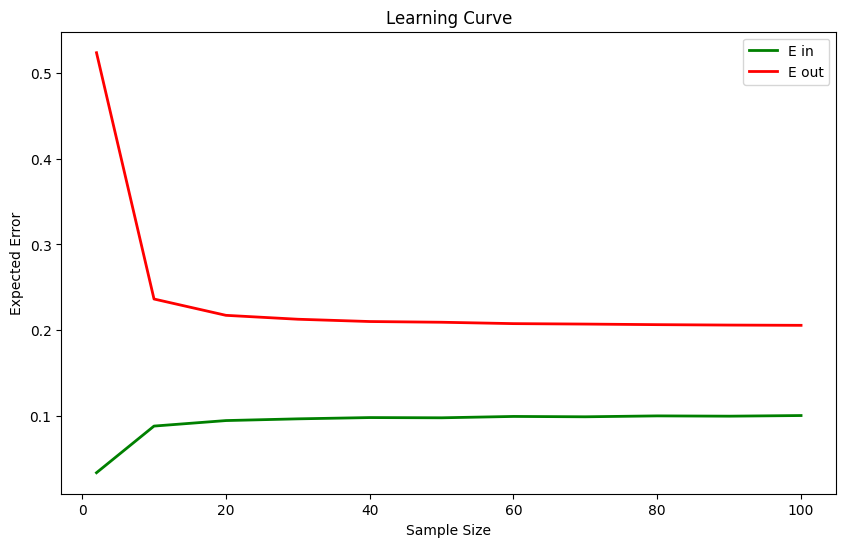

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(sample_size_sets, E_in_all, label='E in', c="green", linewidth=2.0)
plt.plot(sample_size_sets, E_out_all, label='E out', c="red", linewidth=2.0)
plt.xlabel('Sample Size')
plt.ylabel('Expected Error')
plt.title('Learning Curve')
plt.legend()
plt.show()